In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from boundedcontours.filter import gaussian_filter2d
from boundedcontours.contour import contour_plots

# Smooth image selectively

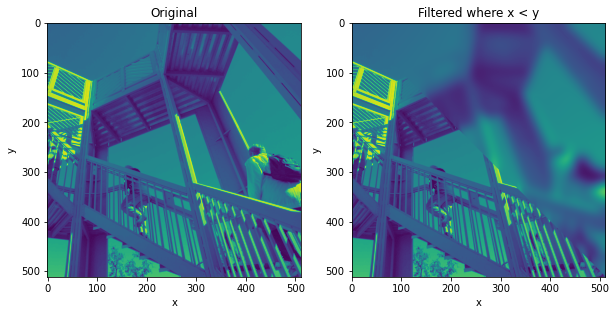

In [3]:
try:
    from scipy.datasets import ascent
except ImportError:
    from scipy.misc import ascent
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ascent = ascent().astype(float)
x, y = np.indices(ascent.shape)
cond = x < y  # only smooth where x < y
result = gaussian_filter2d(ascent, sigma=10, truncate=4, cond=cond, mode="reflect")
ax1.imshow(ascent)
ax1.set_title("Original")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax2.imshow(result)
ax2.set_title("Filtered where x < y")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

# plt.savefig("/tmp/ascent2.png")
plt.show()

# Smooth a bounded 2d probability density function
Smooth a probability density function with a gaussian kernel, but only where x>0.

/var/folders/2n/44xg31f92bd49rgkf9bsy4j80000gr/T/ipykernel_16853/2770241853.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(X, Y, h)
/var/folders/2n/44xg31f92bd49rgkf9bsy4j80000gr/T/ipykernel_16853/2770241853.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(X, Y, h_smooth_scipy)
/var/folders/2n/44xg31f92bd49rgkf9bsy4j80000gr/T/ipykernel_16853/2770241853.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y ha

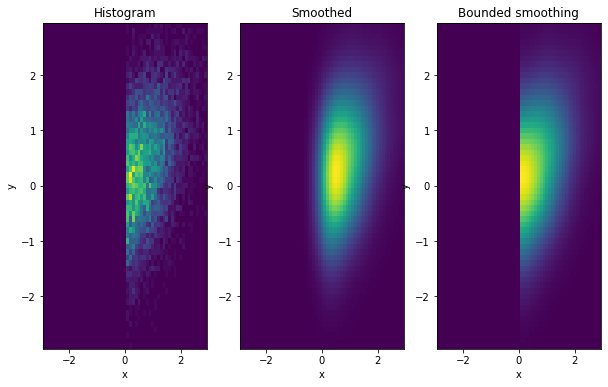

In [4]:
condition_function = lambda x, y: x > 0
x_data, y_data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 20000).T
# delete points where x is negative
c = condition_function(x_data, y_data)
x_data = x_data[c]
y_data = y_data[c]

dx = 0.1
x_bins = np.arange(-3, 3 + dx, dx)
y_bins = np.arange(-3, 3 + dx, dx)
h, _, _ = np.histogram2d(x_data, y_data, bins=(x_bins, y_bins), density=True)
h = h.T
X, Y = np.meshgrid(x_bins[:-1] + dx / 2, y_bins[:-1] + dx / 2)

# smooth without condition
sigma = 3
truncate = 4
mode = "reflect"
h_smooth_scipy = scipy.ndimage.gaussian_filter(
    h, sigma=sigma, truncate=truncate, mode=mode
)
h_smooth_bounded = gaussian_filter2d(
    h, sigma=sigma, truncate=truncate, mode=mode, cond=condition_function(X, Y)
)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


ax1.pcolormesh(X, Y, h)
ax1.set_title("Histogram")

ax2.pcolormesh(X, Y, h_smooth_scipy)
ax2.set_title("Smoothed")

ax3.pcolormesh(X, Y, h_smooth_bounded)
ax3.set_title("Bounded smoothing")

for ax in [ax1, ax2, ax3]:
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.show()

# Plot bounded contours of the same data

(<AxesSubplot:xlabel='x', ylabel='y'>, <AxesSubplot:xlabel='x', ylabel='y'>)

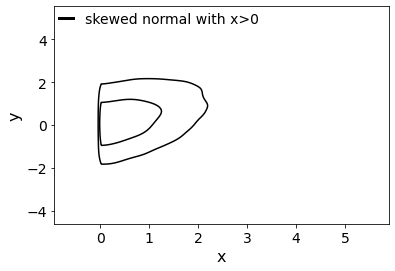

In [5]:
contour_plots(
    samples_list=[(x_data, y_data)],
    labels=["skewed normal with x>0"],
    axes_labels=["x", "y"],
    condition_function=condition_function,
    colors="k",
    target_nbins=100,
    max_bin_width=4,
    linewidth=1.5,
    sigma_smooth=3,
    truncate=4,
    p_levels=[0.5, 0.9],
    axes_lims=None,
    bins_2d_kwargs={},
)